# Import requirements

Uploading the train and test set to the Colab environment

In [ ]:
from google.colab import files
files.upload()

Saving Case0_smp_test.xlsx to Case0_smp_test.xlsx
Saving Case0_smp_train.xlsx to Case0_smp_train.xlsx


{'Case0_smp_test.xlsx': b'PK\x03\x04\x14\x00\x08\x08\x08\x00 \x97\xbeV\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x13\x00\x00\x00[Content_Types].xml\xb5S\xcbn\xc20\x10\xfc\x95\xc8\xd7*6\xf4PU\x15\x81C\x1f\xc7\x16\xa9\xf4\x03\\{\x93X\xf8%\xaf\xa1\xf0\xf7]\x078\x94R\x89\nq\xf2cfgfW\xf6d\xb6q\xb6ZCB\x13|\xc3\xc6|\xc4*\xf0*h\xe3\xbb\x86},^\xea{Va\x96^K\x1b<4\xcc\x076\x9bN\x16\xdb\x08XQ\xa9\xc7\x86\xf59\xc7\x07!P\xf5\xe0$\xf2\x10\xc1\x13\xd2\x86\xe4d\xa6c\xeaD\x94j);\x10\xb7\xa3\xd1\x9dP\xc1g\xf0\xb9\xceE\x83M\'O\xd0\xca\x95\xcd\xd5\xe3\xee\xbeH7L\xc6h\x8d\x92\x99R\x89\xb5\xd7G\xa2\xf5^\x90\'\xb0\x03\x07{\x13\xf1\x86\x08\xacz\xde\x90\xca\xae\x1bB\x91\x893\x1c\x8e\x0b\xcb\x99\xea\xdeh.\xc9h\xf8W\xb4\xd0\xb6F\x81\x0ej\xe5\xa8\x84CQ\xd5\xa0\xeb\x98\x88\x98\xb2\x81}\xce\xb9L\xf9U:\x12\x14D\x9e\x13\x8a\x82\xa4\xf9%\xde\x87\xb1\xa8\x90\xe0,\xc3B\xbc\xc8\xf1\xa8[\x8c\t\xa4\xc6\x1e ;\xcb\xb1\x97\t\xf4{N\xf4\x98~\x87\xd8X\xf1\x83p\xc5\x1cykOL\xa1\x04\x18\x90kN\x80V\xee\xa4\xf1\xa7\xdc\xbfBZ~\x8

### Import Libraries & Data

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict

from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn import linear_model

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score

In [ ]:
data = pd.read_excel('/content/Case0_smp_train.xlsx')

# Exploring The Dataset

In [ ]:
data.head()

,poliçeleşme yılı,poliçeleşme ayı,ürün grubu,hasarsızlık kademesi,teminat,hasar tutarı,hasar frekansı,müşt. yaşı,müşteri kadın mı,müşteri şehirde mi,...,kurumsal ürün mü,araç kullanım tarzı,araç üretim çıkış yılı,spor araba mı,müşterinin evinin yaşı,müşterinin evinin alanı,konum gelişmişlik puanı,bilinen geçmiş sağlık sorunları,prim ödeme taksit sayısı,poliçe primi (ücret)
0,YEAR,MONTH,POLICY_TYPE,NO_CLAIMS_LEVEL,COVER,CLAIM,CLAIM_FREQ,CUST_AGE,CUST_GENDER_F,LOCATION_URBAN,...,TYPE_CORP,VEHICLE_TYPE,VEHICLE_YEAR,FLAG_SPORTS_CAR,HOME_AGE,HOME_M2,LOC_INDEX,PRE_HEALTH_ISSUES,INSTALLMENTS,PREMIUM
1,2019,8,MOD,4,76450,66911,3,19,0,1,...,0,Mini Bus,2019,0,?,?,17,?,8,4834
2,2020,5,MOD,3,82650,65008,1,19,0,0,...,0,Personal Car,2019,1,?,?,30,?,12,2856
3,2019,10,MOD,1,37050,35060,1,23,0,1,...,0,Mini Bus,2016,1,?,?,93,?,8,3836
4,2020,7,MOD,1,29790,23593,1,27,1,0,...,0,Personal Car,2016,1,?,?,69,?,5,2222


In [ ]:
data['poliçeleşme yılı'].unique

<bound method Series.unique of 0       YEAR
1       2019
2       2020
3       2019
4       2020
        ... 
1838    2020
1839    2020
1840    2021
1841    2020
1842    2020
Name: poliçeleşme yılı, Length: 1843, dtype: object>

In [ ]:
shape = data.shape
num_rows, num_columns = shape
size = data.size

print("Shape (rows, columns):", shape)
print("Number of columns:", num_columns)
print("Size of the dataset:", size)

Shape (rows, columns): (1843, 25)
Number of columns: 25
Size of the dataset: 46075


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1843 entries, 0 to 1842
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   poliçeleşme yılı                 1843 non-null   object
 1   poliçeleşme ayı                  1843 non-null   object
 2   ürün grubu                       1843 non-null   object
 3   hasarsızlık kademesi             1843 non-null   object
 4   teminat                          1843 non-null   object
 5   hasar tutarı                     1843 non-null   object
 6   hasar frekansı                   1843 non-null   object
 7   müşt. yaşı                       1843 non-null   object
 8   müşteri kadın mı                 1843 non-null   object
 9   müşteri şehirde mi               1843 non-null   object
 10  hasar nedeni                     1843 non-null   object
 11  müşterinin tahmini geliri        1843 non-null   object
 12  findeks skoru                    1

Find the duplicated values

In [ ]:
data.duplicated().any()

False

Find the missing values

In [ ]:
data.isna().sum()

poliçeleşme yılı                   0
poliçeleşme ayı                    0
ürün grubu                         0
hasarsızlık kademesi               0
teminat                            0
hasar tutarı                       0
hasar frekansı                     0
müşt. yaşı                         0
müşteri kadın mı                   0
müşteri şehirde mi                 0
hasar nedeni                       0
müşterinin tahmini geliri          0
findeks skoru                      0
müşt. meslek grubu                 0
Medeni durum                       0
kurumsal ürün mü                   0
araç kullanım tarzı                0
araç üretim çıkış yılı             0
spor araba mı                      0
müşterinin evinin yaşı             0
müşterinin evinin alanı            0
konum gelişmişlik puanı            0
bilinen geçmiş sağlık sorunları    0
prim ödeme taksit sayısı           0
poliçe primi (ücret)               0
dtype: int64

Determining whether there are meaningless values

In [ ]:
def set_membership(expected_values=[], column_name=''):
  expected_values = expected_values
  unexpected_values = set(data[column_name].unique()) - set(expected_values)

  if unexpected_values:
      print(f"Mistake! Unexpected values: {unexpected_values}")
  else:
      print("Values in categorical columns are appropriate.")

In [ ]:
set_membership(['0', '1'], 'müşteri kadın mı')

Mistake! Unexpected values: {0, 1, 'CUST_GENDER_F'}


In [ ]:
set_membership(['Divorced', 'Single', 'Married'], 'Medeni durum')

Mistake! Unexpected values: {0, 1, 'CUST_MARITAL_SINGLE'}


# Feature Engineering

In [ ]:
df_train = pd.DataFrame(data)
test_data = pd.read_excel('/content/Case0_smp_test.xlsx')
df_test = pd.DataFrame(test_data)

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [ ]:
df_test.head()

,YEAR,MONTH,POLICY_TYPE,NO_CLAIMS_LEVEL,COVER,CLAIM,CLAIM_FREQ,CUST_AGE,CUST_GENDER_F,LOCATION_URBAN,...,TYPE_CORP,VEHICLE_TYPE,VEHICLE_YEAR,FLAG_SPORTS_CAR,HOME_AGE,HOME_M2,LOC_INDEX,PRE_HEALTH_ISSUES,INSTALLMENTS,PREMIUM
0,2022,6,MOD,0,61050,38737,1,61,1,0,...,0,Personal Car,2009,0,?,?,72,?,1,5582
1,2022,4,MOD,5,58370,33033,1,45,1,0,...,0,Personal Car,2015,0,?,?,31,?,9,3400
2,2022,3,MOD,5,71560,47131,1,61,0,1,...,0,Personal Car,2016,1,?,?,10,?,8,4116
3,2022,10,MOD,4,61340,22114,1,55,0,0,...,0,Personal Car,2017,0,?,?,58,?,9,4080
4,2022,1,MOD,3,36500,31604,1,51,1,1,...,0,Mini Truck,2013,0,?,?,33,?,10,2976


### Since the column names in the Train data are Turkish, we must make them suitable for the test set.

In [ ]:
df_train.columns = df_train.iloc[0]
df_train = df_train[1:]
df_train.reset_index(drop=True, inplace=True)

In [ ]:
df_train.head()

,YEAR,MONTH,POLICY_TYPE,NO_CLAIMS_LEVEL,COVER,CLAIM,CLAIM_FREQ,CUST_AGE,CUST_GENDER_F,LOCATION_URBAN,...,TYPE_CORP,VEHICLE_TYPE,VEHICLE_YEAR,FLAG_SPORTS_CAR,HOME_AGE,HOME_M2,LOC_INDEX,PRE_HEALTH_ISSUES,INSTALLMENTS,PREMIUM
0,2019,8,MOD,4,76450,66911,3,19,0,1,...,0,Mini Bus,2019,0,?,?,17,?,8,4834
1,2020,5,MOD,3,82650,65008,1,19,0,0,...,0,Personal Car,2019,1,?,?,30,?,12,2856
2,2019,10,MOD,1,37050,35060,1,23,0,1,...,0,Mini Bus,2016,1,?,?,93,?,8,3836
3,2020,7,MOD,1,29790,23593,1,27,1,0,...,0,Personal Car,2016,1,?,?,69,?,5,2222
4,2020,5,MOD,2,35840,33966,1,37,0,1,...,0,Mini Bus,2020,0,?,?,75,?,1,3566


### Unique value determination for columns that will not be useful in model prediction

In [ ]:
for x in df_train.columns:
  print(f"\n {x} --> {df_train[x].unique()}")


 YEAR --> [2019 2020 2021]

 MONTH --> [8 5 10 7 6 11 9 3 12 1 2 4]

 POLICY_TYPE --> ['MOD']

 NO_CLAIMS_LEVEL --> [4 3 1 2 5 0]

 COVER --> [76450 82650 37050 29790 35840 29770 34850 52690 30240 31120 43560 33860
 32320 39250 18040 47160 21010 46610 23430 27930 17050 43200 31230 19470
 25510 18700 28580 16830 20570 18370 13750 14410 20010 16060 15730 18260
 23640 23760 14630 18480 29470 29580 23920 14190 20020 14850 44440 20240
 14740 18590 16280 15290 31880 16720 13860 11770 41140 15400 26940 13970
 26280 35620 28810 16610 22760 13640 14080 19030 19360 19800 15180 12760
 37160 17820 7810 27710 16940 12650 17380 16170 17710 13420 9680 11550
 12430 17600 12980 11440 11880 15620 11220 12100 17930 12210 17270 13090
 15840 8580 21770 14520 15510 14300 13530 17160 10340 12320 15950 11330
 20130 18150 11990 12870 15070 19910 9460 14960 10890 13200 7590 12540
 10450 11110 10560 10010 10670 9240 9350 10120 11000 8360 18810 20460
 11660 21220 6050 8690 10780 7920 10230 9130 13310 9790 8140 7

In [ ]:
df_train = df_train.drop(['POLICY_TYPE','HOME_AGE','HOME_M2', 'PRE_HEALTH_ISSUES', 'TYPE_CORP'], axis = 1)
df_test = df_test.drop(['POLICY_TYPE','HOME_AGE','HOME_M2', 'PRE_HEALTH_ISSUES', 'TYPE_CORP'], axis = 1)

### Since it would be healthier to operate from a single data set and the test set is insufficient, combining the two data

In [ ]:
df_train.columns

Index(['YEAR', 'MONTH', 'NO_CLAIMS_LEVEL', 'COVER', 'CLAIM', 'CLAIM_FREQ',
       'CUST_AGE', 'CUST_GENDER_F', 'LOCATION_URBAN', 'CLAIM_REASON',
       'CUST_INCOME', 'CUST_FINDEKS', 'CUST_EMPLOYMENT', 'CUST_MARITAL_SINGLE',
       'VEHICLE_TYPE', 'VEHICLE_YEAR', 'FLAG_SPORTS_CAR', 'LOC_INDEX',
       'INSTALLMENTS', 'PREMIUM'],
      dtype='object', name=0)

In [ ]:
df_test.columns

Index(['YEAR', 'MONTH', 'NO_CLAIMS_LEVEL', 'COVER', 'CLAIM', 'CLAIM_FREQ',
       'CUST_AGE', 'CUST_GENDER_F', 'LOCATION_URBAN', 'CLAIM_REASON',
       'CUST_INCOME', 'CUST_FINDEKS', 'CUST_EMPLOYMENT', 'CUST_MARITAL_SINGLE',
       'VEHICLE_TYPE', 'VEHICLE_YEAR', 'FLAG_SPORTS_CAR', 'LOC_INDEX',
       'INSTALLMENTS', 'PREMIUM'],
      dtype='object')

In [ ]:
df = pd.concat([df_train, df_test], ignore_index=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2427 entries, 0 to 2426
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   YEAR                 2427 non-null   object
 1   MONTH                2427 non-null   object
 2   NO_CLAIMS_LEVEL      2427 non-null   object
 3   COVER                2427 non-null   object
 4   CLAIM                2427 non-null   object
 5   CLAIM_FREQ           2427 non-null   object
 6   CUST_AGE             2427 non-null   object
 7   CUST_GENDER_F        2427 non-null   object
 8   LOCATION_URBAN       2427 non-null   object
 9   CLAIM_REASON         2427 non-null   object
 10  CUST_INCOME          2427 non-null   object
 11  CUST_FINDEKS         2427 non-null   object
 12  CUST_EMPLOYMENT      2427 non-null   object
 13  CUST_MARITAL_SINGLE  2427 non-null   object
 14  VEHICLE_TYPE         2427 non-null   object
 15  VEHICLE_YEAR         2427 non-null   object
 16  FLAG_S

### We separate the two data types to make the data type of data with numerical values numerical and to evaluate categorical data correctly.

In [ ]:
numeric_columns = df.columns.difference(['CLAIM_REASON', 'CUST_EMPLOYMENT', 'VEHICLE_TYPE',
                                         'CUST_GENDER_F', 'LOCATION_URBAN', 'CUST_MARITAL_SINGLE','FLAG_SPORTS_CAR'])

df_numeric = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

In [ ]:
df[numeric_columns] = df_numeric

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2427 entries, 0 to 2426
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   YEAR                 2427 non-null   int64 
 1   MONTH                2427 non-null   int64 
 2   NO_CLAIMS_LEVEL      2427 non-null   int64 
 3   COVER                2427 non-null   int64 
 4   CLAIM                2427 non-null   int64 
 5   CLAIM_FREQ           2427 non-null   int64 
 6   CUST_AGE             2427 non-null   int64 
 7   CUST_GENDER_F        2427 non-null   object
 8   LOCATION_URBAN       2427 non-null   object
 9   CLAIM_REASON         2427 non-null   object
 10  CUST_INCOME          2427 non-null   int64 
 11  CUST_FINDEKS         2427 non-null   int64 
 12  CUST_EMPLOYMENT      2427 non-null   object
 13  CUST_MARITAL_SINGLE  2427 non-null   object
 14  VEHICLE_TYPE         2427 non-null   object
 15  VEHICLE_YEAR         2427 non-null   int64 
 16  FLAG_S

### IQR application for outliers

In [ ]:
total_outliers = 0

def remove_outliers(df, numerical_columns):
    global total_outliers

    for column in numerical_columns:

        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Detect outliers value
        outliers = (df[column] < lower_bound) | (df[column] > upper_bound)

        total_outliers += outliers.sum()

        print(f"\n *** {column} ***")
        print("IQR: ", IQR)
        print("Upper bound: ", upper_bound)
        print("Lower bound: ", lower_bound)
        print("Total Outliers: ", total_outliers)

        # Drop outliers
        df = df[~outliers]

        # Fill NaN values with the median of the column
        median_value = df[column].median()
        df[column] = df[column].fillna(median_value)

    df.reset_index(drop=True, inplace=True)
    return df


In [ ]:
df_numeric = remove_outliers(df, numeric_columns)


 *** CLAIM ***
IQR:  0.0
Upper bound:  0.0
Lower bound:  0.0
Total Outliers:  524

 *** CLAIM_FREQ ***
IQR:  0.0
Upper bound:  0.0
Lower bound:  0.0
Total Outliers:  527

 *** COVER ***
IQR:  4600.0
Upper bound:  22500.0
Lower bound:  4100.0
Total Outliers:  563

 *** CUST_AGE ***
IQR:  26.0
Upper bound:  96.0
Lower bound:  -8.0
Total Outliers:  563

 *** CUST_FINDEKS ***
IQR:  895.75
Upper bound:  2745.875
Lower bound:  -837.125
Total Outliers:  563

 *** CUST_INCOME ***
IQR:  14466.5
Upper bound:  61965.75
Lower bound:  4099.75
Total Outliers:  653

 *** INSTALLMENTS ***
IQR:  6.0
Upper bound:  19.0
Lower bound:  -5.0
Total Outliers:  653

 *** LOC_INDEX ***
IQR:  50.0
Upper bound:  151.0
Lower bound:  -49.0
Total Outliers:  653

 *** MONTH ***
IQR:  7.0
Upper bound:  20.5
Lower bound:  -7.5
Total Outliers:  653

 *** NO_CLAIMS_LEVEL ***
IQR:  3.0
Upper bound:  8.5
Lower bound:  -3.5
Total Outliers:  653

 *** PREMIUM ***
IQR:  1016.0
Upper bound:  5144.0
Lower bound:  1080.0
Total 

<ipython-input-26-fdad5449c2a5>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].fillna(median_value)


In [ ]:
df[numeric_columns].isna().sum()

CLAIM              0
CLAIM_FREQ         0
COVER              0
CUST_AGE           0
CUST_FINDEKS       0
CUST_INCOME        0
INSTALLMENTS       0
LOC_INDEX          0
MONTH              0
NO_CLAIMS_LEVEL    0
PREMIUM            0
VEHICLE_YEAR       0
YEAR               0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2427 entries, 0 to 2426
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   YEAR                 2427 non-null   int64 
 1   MONTH                2427 non-null   int64 
 2   NO_CLAIMS_LEVEL      2427 non-null   int64 
 3   COVER                2427 non-null   int64 
 4   CLAIM                2427 non-null   int64 
 5   CLAIM_FREQ           2427 non-null   int64 
 6   CUST_AGE             2427 non-null   int64 
 7   CUST_GENDER_F        2427 non-null   object
 8   LOCATION_URBAN       2427 non-null   object
 9   CLAIM_REASON         2427 non-null   object
 10  CUST_INCOME          2427 non-null   int64 
 11  CUST_FINDEKS         2427 non-null   int64 
 12  CUST_EMPLOYMENT      2427 non-null   object
 13  CUST_MARITAL_SINGLE  2427 non-null   object
 14  VEHICLE_TYPE         2427 non-null   object
 15  VEHICLE_YEAR         2427 non-null   int64 
 16  FLAG_S

### One-Hot encoding for categorical columns

In [ ]:
categorical_columns = ['CLAIM_REASON', 'CUST_EMPLOYMENT', 'VEHICLE_TYPE',
                                         'CUST_GENDER_F', 'LOCATION_URBAN', 'CUST_MARITAL_SINGLE','FLAG_SPORTS_CAR']

df_categorical = df[categorical_columns]

In [ ]:
df_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2427 entries, 0 to 2426
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   CLAIM_REASON         2427 non-null   object
 1   CUST_EMPLOYMENT      2427 non-null   object
 2   VEHICLE_TYPE         2427 non-null   object
 3   CUST_GENDER_F        2427 non-null   object
 4   LOCATION_URBAN       2427 non-null   object
 5   CUST_MARITAL_SINGLE  2427 non-null   object
 6   FLAG_SPORTS_CAR      2427 non-null   object
dtypes: object(7)
memory usage: 132.9+ KB


In [ ]:
df_encoded = pd.get_dummies(df_categorical, columns=categorical_columns, drop_first=True)
df = df.drop(categorical_columns, axis=1)
df = pd.concat([df, df_encoded], axis=1)

<ipython-input-32-f2f95c5f910d>:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df_encoded = pd.get_dummies(df_categorical, columns=categorical_columns, drop_first=True)
<ipython-input-32-f2f95c5f910d>:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df_encoded = pd.get_dummies(df_categorical, columns=categorical_columns, drop_first=True)
<ipython-input-32-f2f95c5f910d>:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df_encoded = pd.get_dummies(df_categorical, columns=categorical_columns, drop_first=True)
<ipython-input-32-f2f95c5f910d>:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching S

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2427 entries, 0 to 2426
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   YEAR                           2427 non-null   int64
 1   MONTH                          2427 non-null   int64
 2   NO_CLAIMS_LEVEL                2427 non-null   int64
 3   COVER                          2427 non-null   int64
 4   CLAIM                          2427 non-null   int64
 5   CLAIM_FREQ                     2427 non-null   int64
 6   CUST_AGE                       2427 non-null   int64
 7   CUST_INCOME                    2427 non-null   int64
 8   CUST_FINDEKS                   2427 non-null   int64
 9   VEHICLE_YEAR                   2427 non-null   int64
 10  LOC_INDEX                      2427 non-null   int64
 11  INSTALLMENTS                   2427 non-null   int64
 12  PREMIUM                        2427 non-null   int64
 13  CLAIM_REASON_Fire 

In [ ]:
df.isna().sum()

YEAR                             0
MONTH                            0
NO_CLAIMS_LEVEL                  0
COVER                            0
CLAIM                            0
CLAIM_FREQ                       0
CUST_AGE                         0
CUST_INCOME                      0
CUST_FINDEKS                     0
VEHICLE_YEAR                     0
LOC_INDEX                        0
INSTALLMENTS                     0
PREMIUM                          0
CLAIM_REASON_Fire                0
CLAIM_REASON_Theft               0
CUST_EMPLOYMENT_Employed         0
CUST_EMPLOYMENT_Retired          0
CUST_EMPLOYMENT_Self-Employed    0
CUST_EMPLOYMENT_Unemployed       0
VEHICLE_TYPE_Mini Truck          0
VEHICLE_TYPE_Motorcycle          0
VEHICLE_TYPE_Personal Car        0
VEHICLE_TYPE_Van                 0
CUST_GENDER_F_1                  0
LOCATION_URBAN_1                 0
CUST_MARITAL_SINGLE_1            0
FLAG_SPORTS_CAR_1                0
dtype: int64

In [ ]:
df.head()

,YEAR,MONTH,NO_CLAIMS_LEVEL,COVER,CLAIM,CLAIM_FREQ,CUST_AGE,CUST_INCOME,CUST_FINDEKS,VEHICLE_YEAR,...,CUST_EMPLOYMENT_Self-Employed,CUST_EMPLOYMENT_Unemployed,VEHICLE_TYPE_Mini Truck,VEHICLE_TYPE_Motorcycle,VEHICLE_TYPE_Personal Car,VEHICLE_TYPE_Van,CUST_GENDER_F_1,LOCATION_URBAN_1,CUST_MARITAL_SINGLE_1,FLAG_SPORTS_CAR_1
0,2019,8,4,76450,66911,3,19,36913,162,2019,...,0,0,0,0,0,0,0,1,0,0
1,2020,5,3,82650,65008,1,19,38803,9,2019,...,0,0,0,0,1,0,0,0,1,1
2,2019,10,1,37050,35060,1,23,18945,906,2016,...,0,0,0,0,0,0,0,1,0,1
3,2020,7,1,29790,23593,1,27,16762,570,2016,...,0,0,0,0,1,0,1,0,0,1
4,2020,5,2,35840,33966,1,37,60550,321,2020,...,0,0,0,0,0,0,0,1,1,0


# Data Visulation

A scatter plot showing the relationship between claim and premium (Year = 2019, 2020, 2021)

In [ ]:
selected_years = [2019, 2020, 2021]

selected_df = df[df['YEAR'].isin(selected_years)]

selected_df["YEAR"].unique()

array([2019, 2020, 2021])

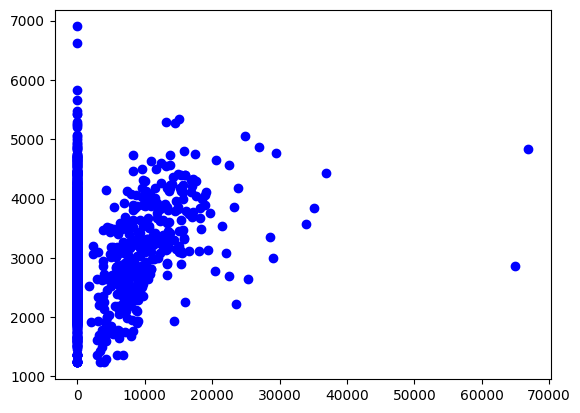

In [ ]:
plt.scatter(selected_df['CLAIM'], selected_df['PREMIUM'], c ="blue")
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2427 entries, 0 to 2426
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   YEAR                           2427 non-null   int64
 1   MONTH                          2427 non-null   int64
 2   NO_CLAIMS_LEVEL                2427 non-null   int64
 3   COVER                          2427 non-null   int64
 4   CLAIM                          2427 non-null   int64
 5   CLAIM_FREQ                     2427 non-null   int64
 6   CUST_AGE                       2427 non-null   int64
 7   CUST_INCOME                    2427 non-null   int64
 8   CUST_FINDEKS                   2427 non-null   int64
 9   VEHICLE_YEAR                   2427 non-null   int64
 10  LOC_INDEX                      2427 non-null   int64
 11  INSTALLMENTS                   2427 non-null   int64
 12  PREMIUM                        2427 non-null   int64
 13  CLAIM_REASON_Fire 

### Correlation Matrix

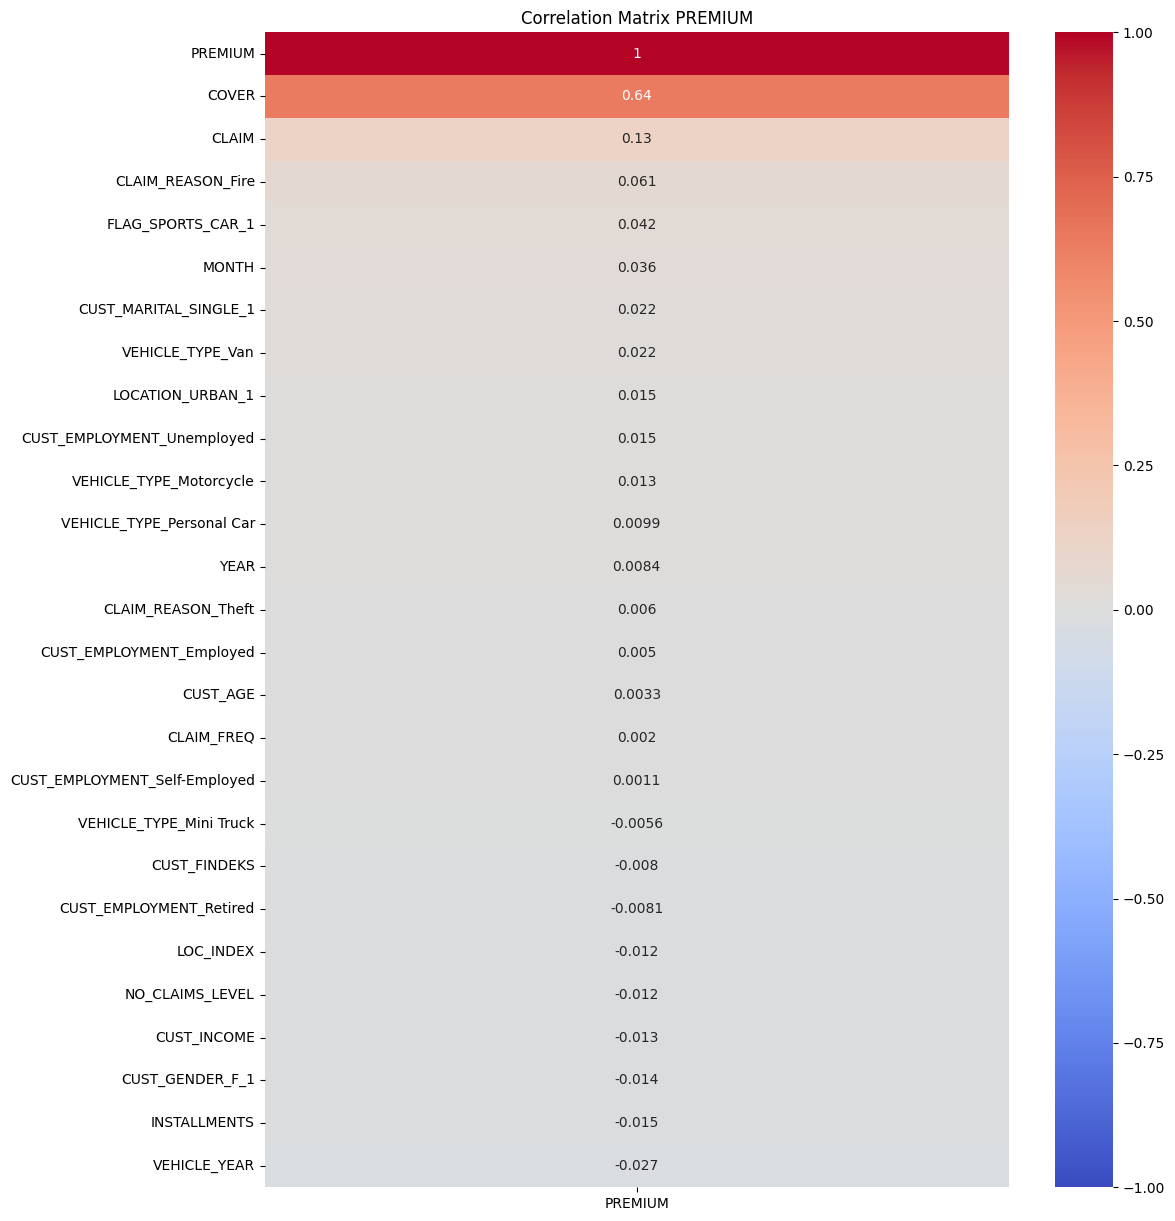

In [ ]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 15))
sns.heatmap(correlation_matrix[['PREMIUM']].sort_values(by='PREMIUM', ascending=False), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix PREMIUM')
plt.show()

Features with high correlation to 'PREMIUM'

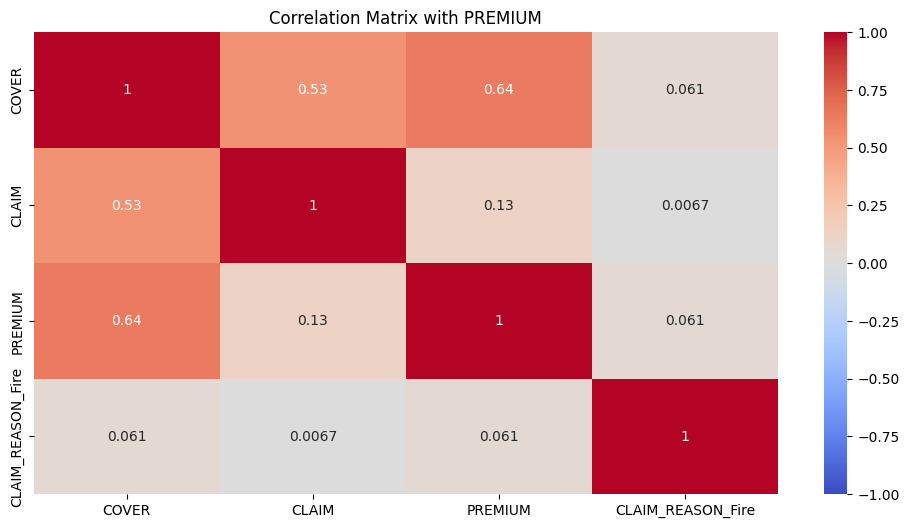

In [ ]:
selected_columns = correlation_matrix[abs(correlation_matrix['PREMIUM']) >= 0.05].index.tolist()

plt.figure(figsize=(12, 6))
sns.heatmap(df[selected_columns].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix with PREMIUM')
plt.show()

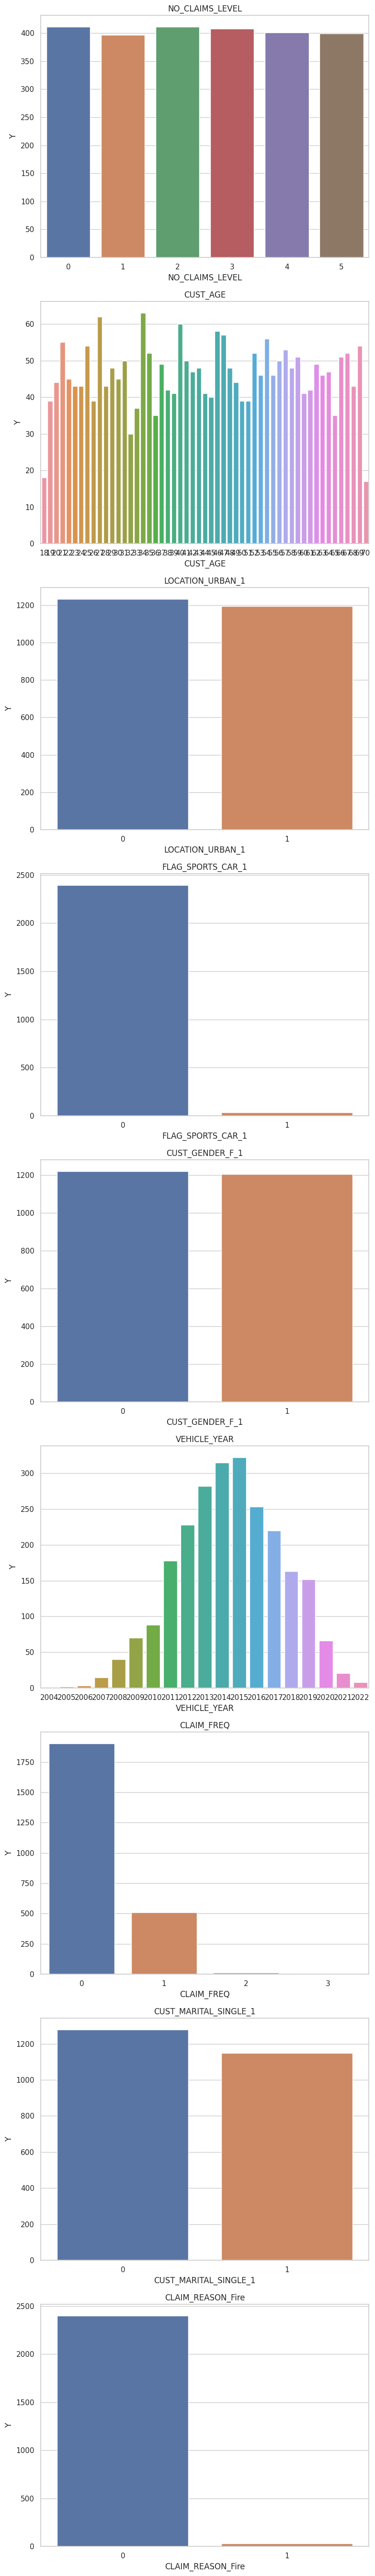

In [ ]:
for_visulation = ['NO_CLAIMS_LEVEL', 'CUST_AGE', 'LOCATION_URBAN_1', 'FLAG_SPORTS_CAR_1',
                  'CUST_GENDER_F_1', 'VEHICLE_YEAR', 'CLAIM_FREQ', 'CUST_MARITAL_SINGLE_1',
                  'CLAIM_REASON_Fire']

plt.figure(figsize=(8, 6 * len(for_visulation)))
sns.set(style="whitegrid")

for i, column in enumerate(for_visulation, 1):
    plt.subplot(len(for_visulation), 1, i)
    sns.countplot(data=df, x=column)
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Y')

plt.tight_layout()
plt.show()


### Deleted featurs with low correlation to 'PREMIUM' for model prediction accuracy

In [ ]:
df.columns

Index(['YEAR', 'MONTH', 'NO_CLAIMS_LEVEL', 'COVER', 'CLAIM', 'CLAIM_FREQ',
       'CUST_AGE', 'CUST_INCOME', 'CUST_FINDEKS', 'VEHICLE_YEAR', 'LOC_INDEX',
       'INSTALLMENTS', 'PREMIUM', 'CLAIM_REASON_Fire', 'CLAIM_REASON_Theft',
       'CUST_EMPLOYMENT_Employed', 'CUST_EMPLOYMENT_Retired',
       'CUST_EMPLOYMENT_Self-Employed', 'CUST_EMPLOYMENT_Unemployed',
       'VEHICLE_TYPE_Mini Truck', 'VEHICLE_TYPE_Motorcycle',
       'VEHICLE_TYPE_Personal Car', 'VEHICLE_TYPE_Van', 'CUST_GENDER_F_1',
       'LOCATION_URBAN_1', 'CUST_MARITAL_SINGLE_1', 'FLAG_SPORTS_CAR_1'],
      dtype='object')

In [ ]:
low_corr_columns= correlation_matrix[abs(correlation_matrix['PREMIUM']) < 0.01].index.tolist()
df = df.drop(low_corr_columns, axis=1)

In [ ]:
df.columns

Index(['MONTH', 'NO_CLAIMS_LEVEL', 'COVER', 'CLAIM', 'CUST_INCOME',
       'VEHICLE_YEAR', 'LOC_INDEX', 'INSTALLMENTS', 'PREMIUM',
       'CLAIM_REASON_Fire', 'CUST_EMPLOYMENT_Unemployed',
       'VEHICLE_TYPE_Motorcycle', 'VEHICLE_TYPE_Van', 'CUST_GENDER_F_1',
       'LOCATION_URBAN_1', 'CUST_MARITAL_SINGLE_1', 'FLAG_SPORTS_CAR_1'],
      dtype='object')

# Model Training

### Scale

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('PREMIUM', axis=1)  # Exclude the target column from features
y = df['PREMIUM']  # Target column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shapes of the resulting sets
print("Training set - Features:", X_train.shape, "Labels:", y_train.shape)
print("Testing set - Features:", X_test.shape, "Labels:", y_test.shape)

Training set - Features: (1698, 16) Labels: (1698,)
Testing set - Features: (729, 16) Labels: (729,)


In [ ]:
df.columns

Index(['MONTH', 'NO_CLAIMS_LEVEL', 'COVER', 'CLAIM', 'CUST_INCOME',
       'VEHICLE_YEAR', 'LOC_INDEX', 'INSTALLMENTS', 'PREMIUM',
       'CLAIM_REASON_Fire', 'CUST_EMPLOYMENT_Unemployed',
       'VEHICLE_TYPE_Motorcycle', 'VEHICLE_TYPE_Van', 'CUST_GENDER_F_1',
       'LOCATION_URBAN_1', 'CUST_MARITAL_SINGLE_1', 'FLAG_SPORTS_CAR_1'],
      dtype='object')

In [ ]:
X= df[['MONTH', 'NO_CLAIMS_LEVEL', 'COVER', 'CLAIM', 'CUST_INCOME',
       'VEHICLE_YEAR', 'LOC_INDEX', 'INSTALLMENTS',
       'CLAIM_REASON_Fire', 'CUST_EMPLOYMENT_Unemployed',
       'VEHICLE_TYPE_Motorcycle', 'VEHICLE_TYPE_Van', 'CUST_GENDER_F_1',
       'LOCATION_URBAN_1', 'CUST_MARITAL_SINGLE_1', 'FLAG_SPORTS_CAR_1']]
y = df['PREMIUM']

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### ML Models

In [ ]:
results_df = pd.DataFrame(columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])

def train_and_evaluate(model_name, input_model, X_train, y_train, X_test, y_test):
    model = input_model
    model.fit(X_train, y_train)

    test_pred = model.predict(X_test)
    train_pred = model.predict(X_train)

    print('Test set evaluation:\n_____________________________________')
    print_evaluate(y_test, test_pred)

    print('------------------------------------------------------------')

    print('Train set evaluation:\n_____________________________________')
    print_evaluate(y_train, train_pred)

    # Assuming evaluate and cross_val functions are defined
    results_df_2 = pd.DataFrame(data=[[model_name, *evaluate(y_test, test_pred), cross_val(model)]],
                                columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])

    # Use global keyword to indicate that results_df is a global variable
    global results_df
    results_df = results_df.append(results_df_2, ignore_index=True)


In [ ]:
def model_evaluation_plotter(model_name, model, figsize=(20, 5)):
    if model_name is None:
        model_name = 'model'

    # Predictions on the test set
    y_pred = model.predict(X_test)

    plt.figure(figsize=figsize)

    # Residuals plot
    plt.subplot(1, 3, 1)
    residuals = y_test - y_pred
    sns.scatterplot(x=y_pred, y=residuals, color='blue')
    plt.axhline(y=0, color='r', linestyle='--')
    plt.title(f"{model_name} Residuals Plot")
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')

    # Distribution of residuals
    plt.subplot(1, 3, 2)
    sns.histplot(residuals, kde=True, color='blue')
    plt.title(f"{model_name} Distribution of Residuals")
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')

    # Actual vs Predicted plot
    plt.subplot(1, 3, 3)
    sns.scatterplot(x=y_test, y=y_pred, color='blue')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
    plt.title(f"{model_name} Actual vs Predicted Values")
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')

    plt.show()

In [ ]:
from sklearn import metrics
def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')

def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

Test set evaluation:
_____________________________________
MAE: 399.9705328741732
MSE: 296437.8913875149
RMSE: 544.4611018130817
R2 Square 0.5270896785875537
__________________________________
------------------------------------------------------------
Train set evaluation:
_____________________________________
MAE: 387.82862024070965
MSE: 285118.98484964017
RMSE: 533.965340494718
R2 Square 0.5351787150326055
__________________________________


<ipython-input-49-0fb1b041c281>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)


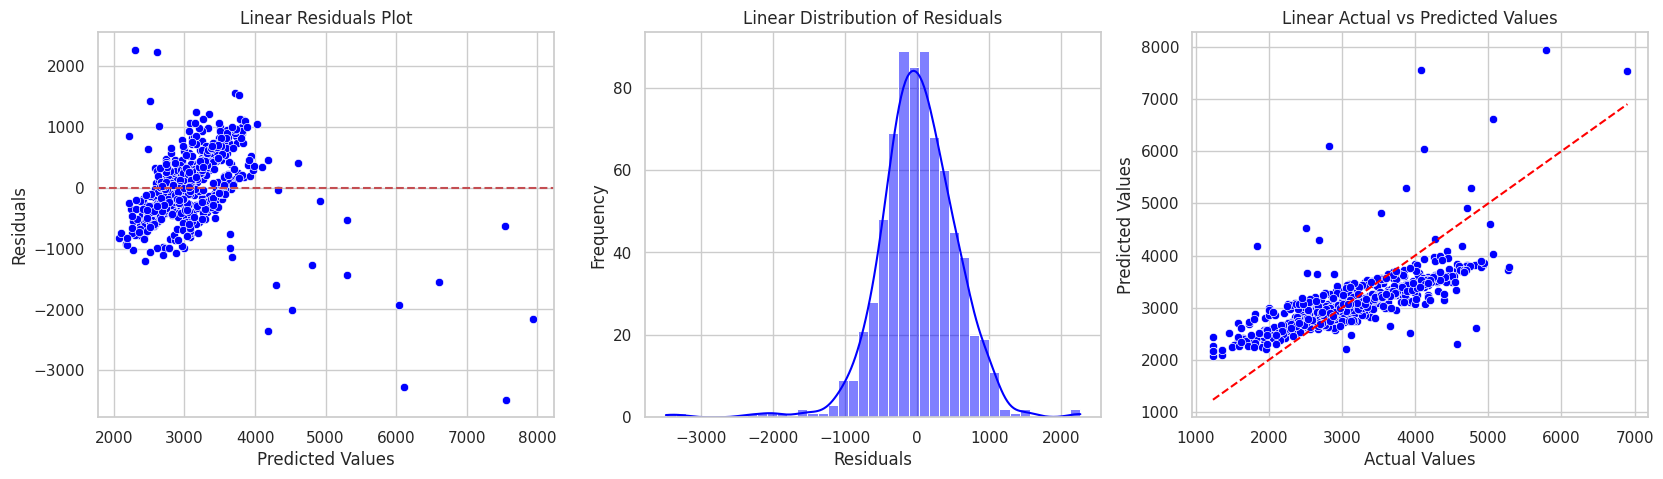

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
train_and_evaluate('LinearRegression', lin_reg, X_train, y_train, X_test, y_test)
model_evaluation_plotter("Linear", lin_reg)

In [ ]:
print(lin_reg.intercept_)

3123.855123674911


In [ ]:
lr_coef = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])
lr_coef

,Coefficient
MONTH,4.773837
NO_CLAIMS_LEVEL,-8.688925
COVER,699.083209
CLAIM,-216.009411
CUST_INCOME,-19.604572
VEHICLE_YEAR,-28.703286
LOC_INDEX,-17.780432
INSTALLMENTS,0.820160
CLAIM_REASON_Fire,9.310532
CUST_EMPLOYMENT_Unemployed,-0.454062


Robust Regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ransac.py:343: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.1 and will be removed in 1.3.
  warnings.warn(


Test set evaluation:
_____________________________________
MAE: 363.69717007640725
MSE: 1059685.1288586482
RMSE: 1029.4100877972044
R2 Square -0.6905262432508295
__________________________________
------------------------------------------------------------
Train set evaluation:
_____________________________________
MAE: 379.39261695633996
MSE: 988753.4629657513
RMSE: 994.3608313714651
R2 Square -0.6119363479568791
__________________________________


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ransac.py:343: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.1 and will be removed in 1.3.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ransac.py:343: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.1 and will be removed in 1.3.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ransac.py:343: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.1 and will be removed in 1.3.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ransac.py:343: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.1 and will be removed in 1.3.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ransac.py:343: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.1 and will be removed in 1.3.
  warnings.warn(
/usr/local/lib/pytho

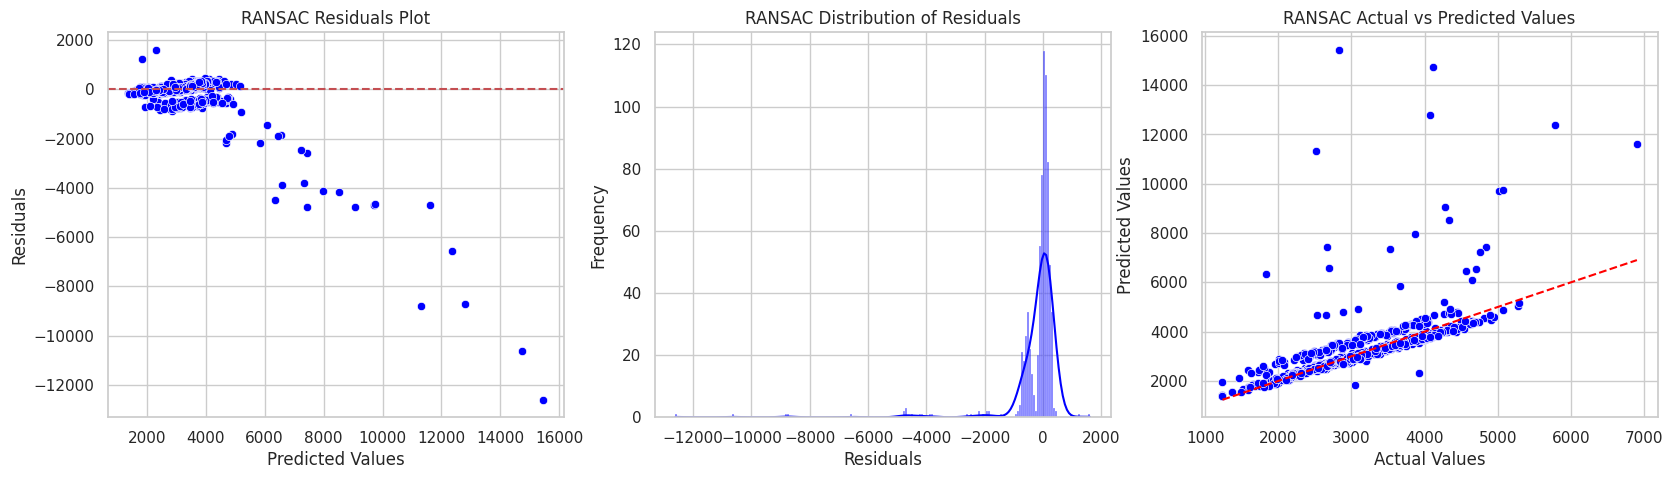

In [ ]:
from sklearn.linear_model import RANSACRegressor

RANSAC = RANSACRegressor(base_estimator=LinearRegression(), max_trials=100)
train_and_evaluate('RANSACRegressor',RANSAC, X_train, y_train, X_test, y_test)
model_evaluation_plotter("RANSAC", RANSAC)

Ridge

Test set evaluation:
_____________________________________
MAE: 414.66486512986506
MSE: 303207.69544251374
RMSE: 550.6429836495819
R2 Square 0.5162897427339969
__________________________________
------------------------------------------------------------
Train set evaluation:
_____________________________________
MAE: 401.1391216414109
MSE: 288525.51774126163
RMSE: 537.1457136953264
R2 Square 0.5296251423836209
__________________________________


<ipython-input-49-0fb1b041c281>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)


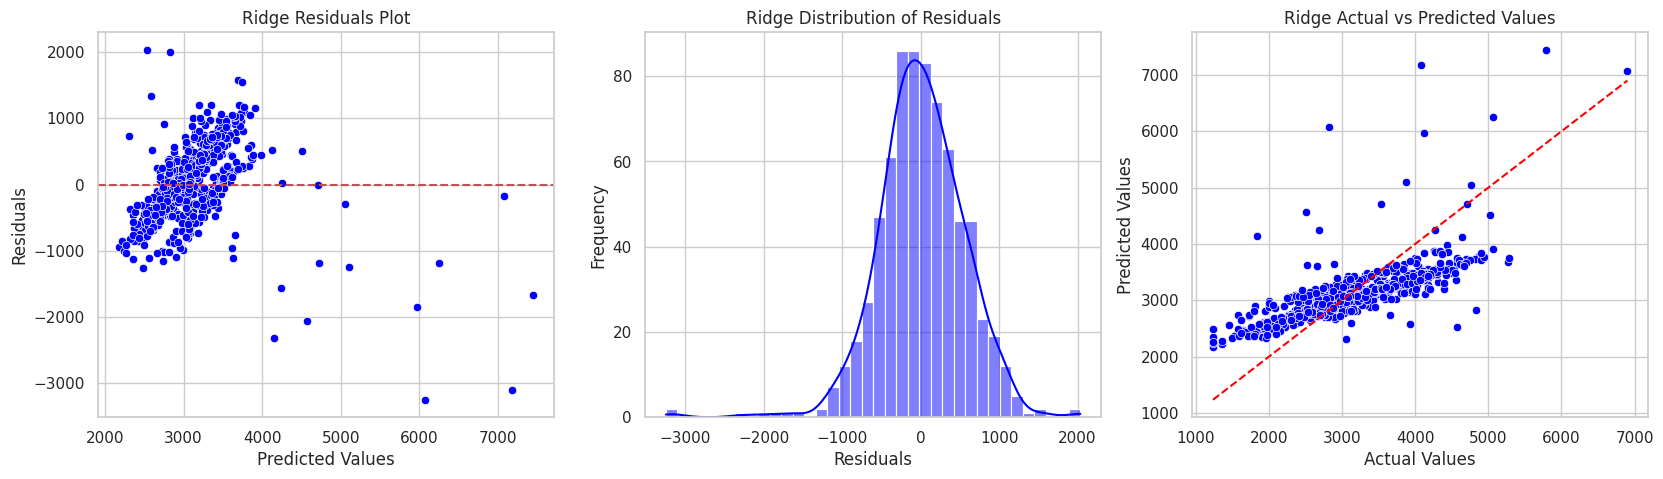

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42)
train_and_evaluate('Ridge', ridge, X_train, y_train, X_test, y_test)
model_evaluation_plotter("Ridge", ridge)

PolynomialFeatures

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)
X_train_2_d = poly_reg.fit_transform(X_train)
X_test_2_d = poly_reg.transform(X_test)

lin_reg = LinearRegression()
lin_reg.fit(X_train_2_d,y_train)

test_pred = lin_reg.predict(X_test_2_d)
train_pred = lin_reg.predict(X_train_2_d)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Polynomail Regression", *evaluate(y_test, test_pred), 0]],
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)


Test set evaluation:
_____________________________________
MAE: 287.9756515775034
MSE: 217863.17189643346
RMSE: 466.75815139795196
R2 Square 0.6524407113974745
__________________________________
Train set evaluation:
_____________________________________
MAE: 232.31065959952886
MSE: 104739.5687573616
RMSE: 323.6349312997001
R2 Square 0.829246091899485
__________________________________


<ipython-input-57-659bd8bd4a39>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)


Test set evaluation:
_____________________________________
MAE: 399.97299013660654
MSE: 296438.2170763423
RMSE: 544.4614009058331
R2 Square 0.5270891590129226
__________________________________
------------------------------------------------------------
Train set evaluation:
_____________________________________
MAE: 387.83078302285793
MSE: 285118.98495557
RMSE: 533.9653405939097
R2 Square 0.535178714859911
__________________________________


<ipython-input-49-0fb1b041c281>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)


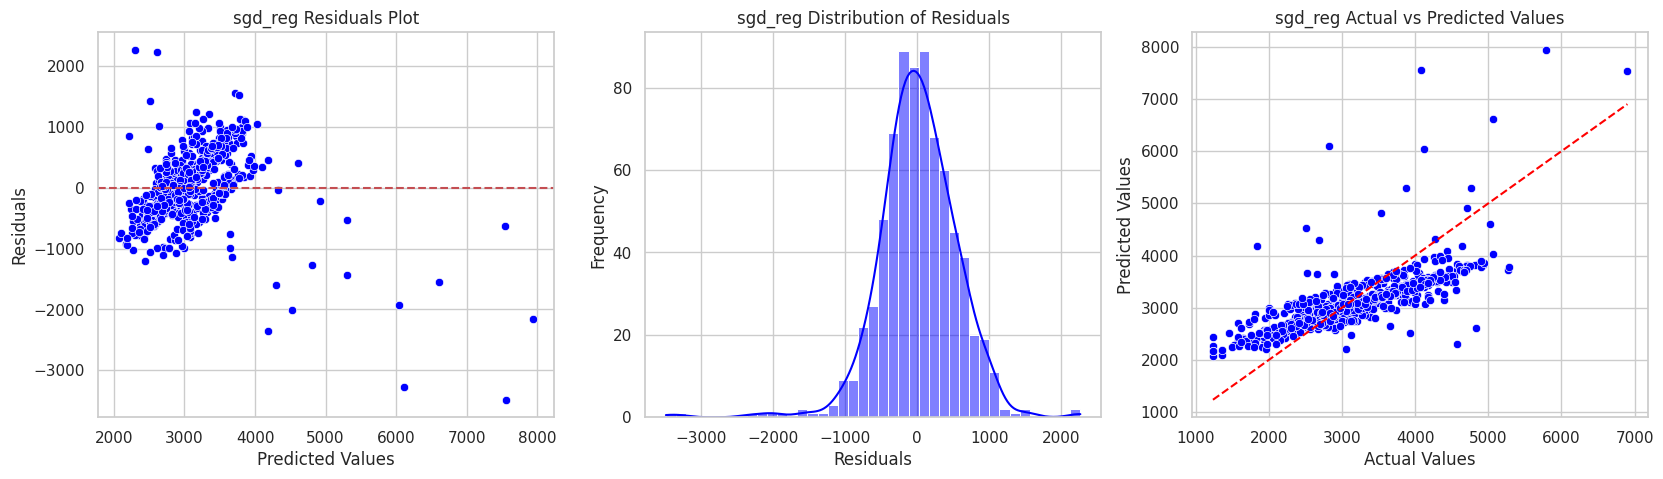

In [ ]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(n_iter_no_change=250, penalty=None, eta0=0.0001, max_iter=100000)
train_and_evaluate('SGDRegressor', sgd_reg, X_train, y_train, X_test, y_test)
model_evaluation_plotter("sgd_reg", sgd_reg)

Test set evaluation:
_____________________________________
MAE: 263.8677009602195
MSE: 145201.04782264473
RMSE: 381.05255257332254
R2 Square 0.7683593218335685
__________________________________
------------------------------------------------------------
Train set evaluation:
_____________________________________
MAE: 94.00688339222614
MSE: 17817.358638096583
RMSE: 133.48167903535145
R2 Square 0.9709528723902673
__________________________________


<ipython-input-49-0fb1b041c281>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)


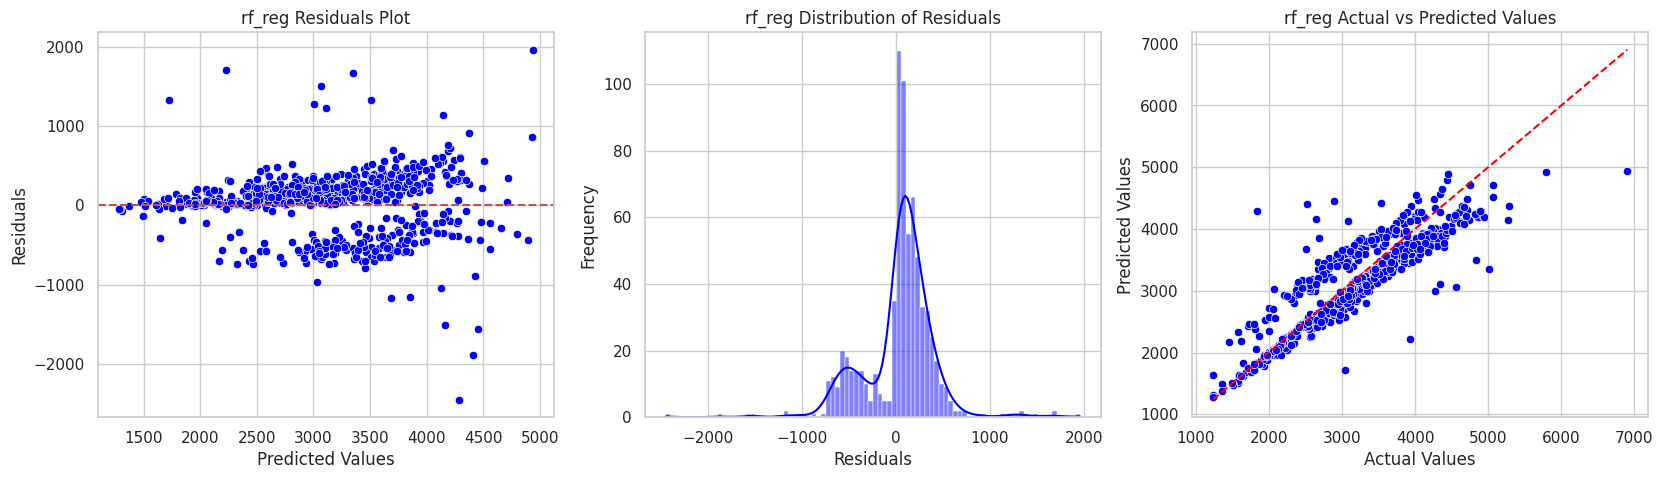

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=1000)
train_and_evaluate('RandomForestRegressor', rf_reg, X_train, y_train, X_test, y_test)
model_evaluation_plotter("rf_reg", rf_reg)

Test set evaluation:
_____________________________________
MAE: 262.42477418871044
MSE: 173800.44203961256
RMSE: 416.8938018723864
R2 Square 0.7227344233158983
__________________________________
------------------------------------------------------------
Train set evaluation:
_____________________________________
MAE: 163.03171484173106
MSE: 80679.13208062632
RMSE: 284.04072257446876
R2 Square 0.8684711301720314
__________________________________


<ipython-input-49-0fb1b041c281>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)


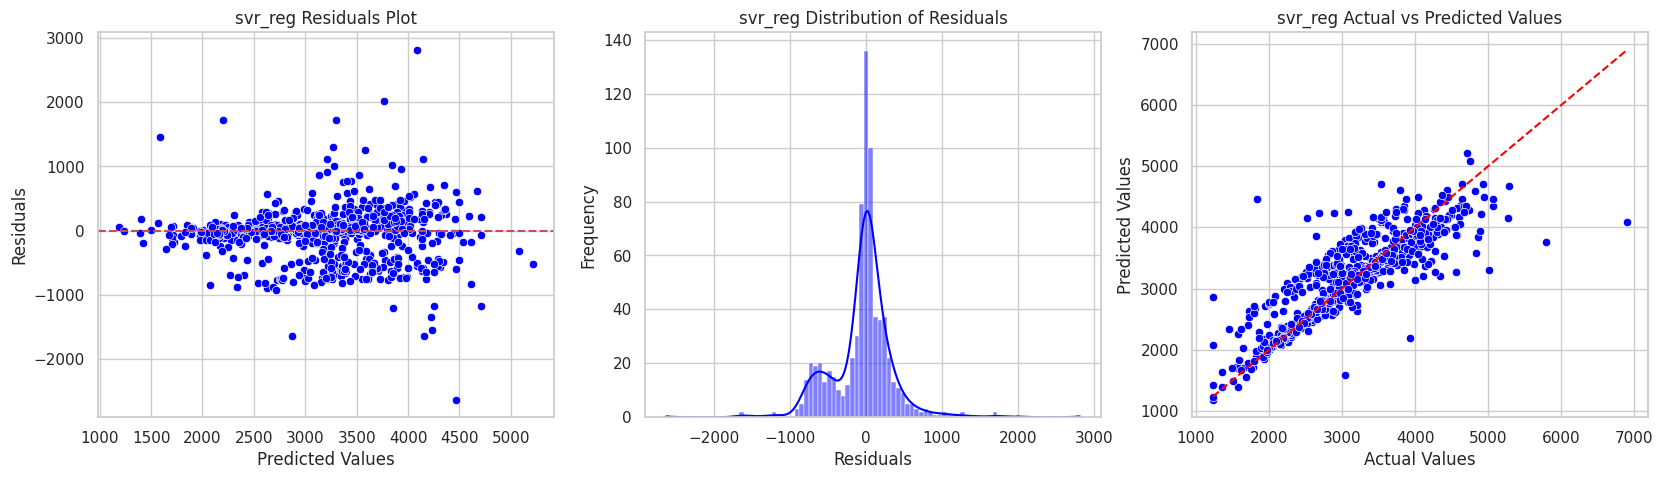

In [ ]:
from sklearn.svm import SVR

svr_reg = SVR(C=1000, epsilon=0.001)
train_and_evaluate('SVR', svr_reg, X_train, y_train, X_test, y_test)
model_evaluation_plotter("svr_reg", svr_reg)

Test set evaluation:
_____________________________________
MAE: 489.38175199222263
MSE: 379280.96376573015
RMSE: 615.8579087465956
R2 Square 0.3949292998930425
__________________________________
------------------------------------------------------------
Train set evaluation:
_____________________________________
MAE: 472.332893289594
MSE: 355601.20522494183
RMSE: 596.3230711828462
R2 Square 0.4202735772373095
__________________________________


<ipython-input-49-0fb1b041c281>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)


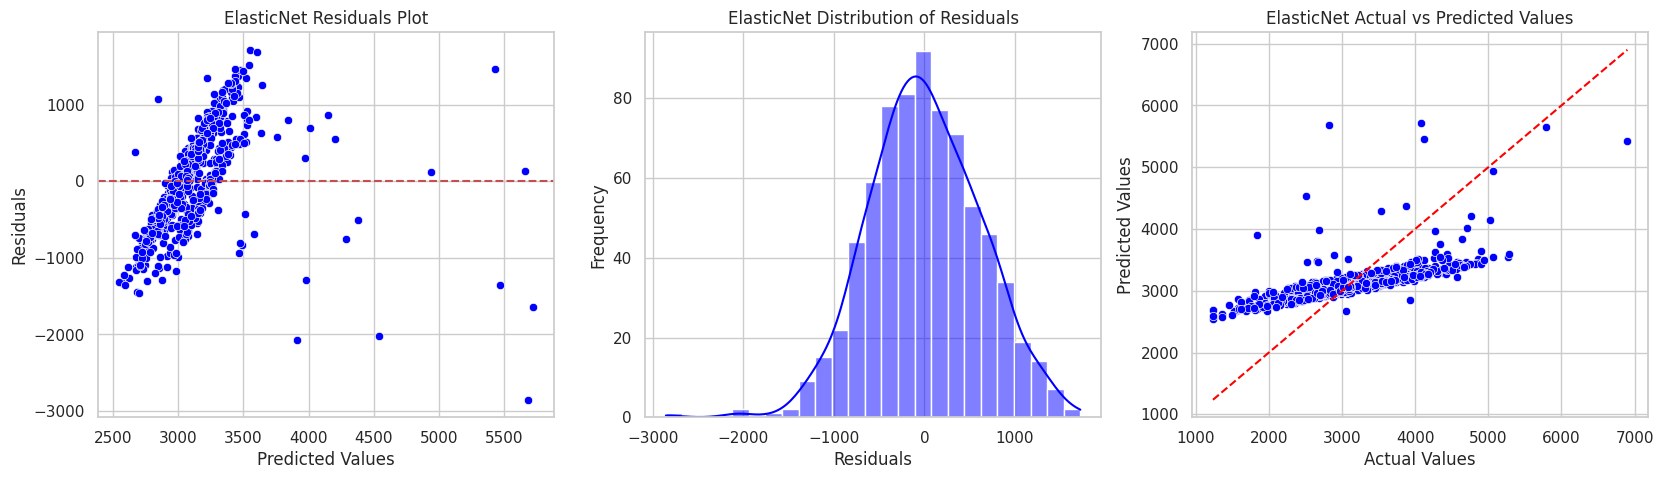

In [ ]:
eNet = ElasticNet(max_iter = 2000)
train_and_evaluate('ElasticNet', eNet, X_train, y_train, X_test, y_test)
model_evaluation_plotter('ElasticNet', eNet)

Test set evaluation:
_____________________________________
MAE: 401.1427374187669
MSE: 296772.69401526573
RMSE: 544.7684774427258
R2 Square 0.5265555646200095
__________________________________
------------------------------------------------------------
Train set evaluation:
_____________________________________
MAE: 388.92638318093884
MSE: 285146.56579085195
RMSE: 533.9911663977709
R2 Square 0.5351337506169899
__________________________________


<ipython-input-49-0fb1b041c281>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)


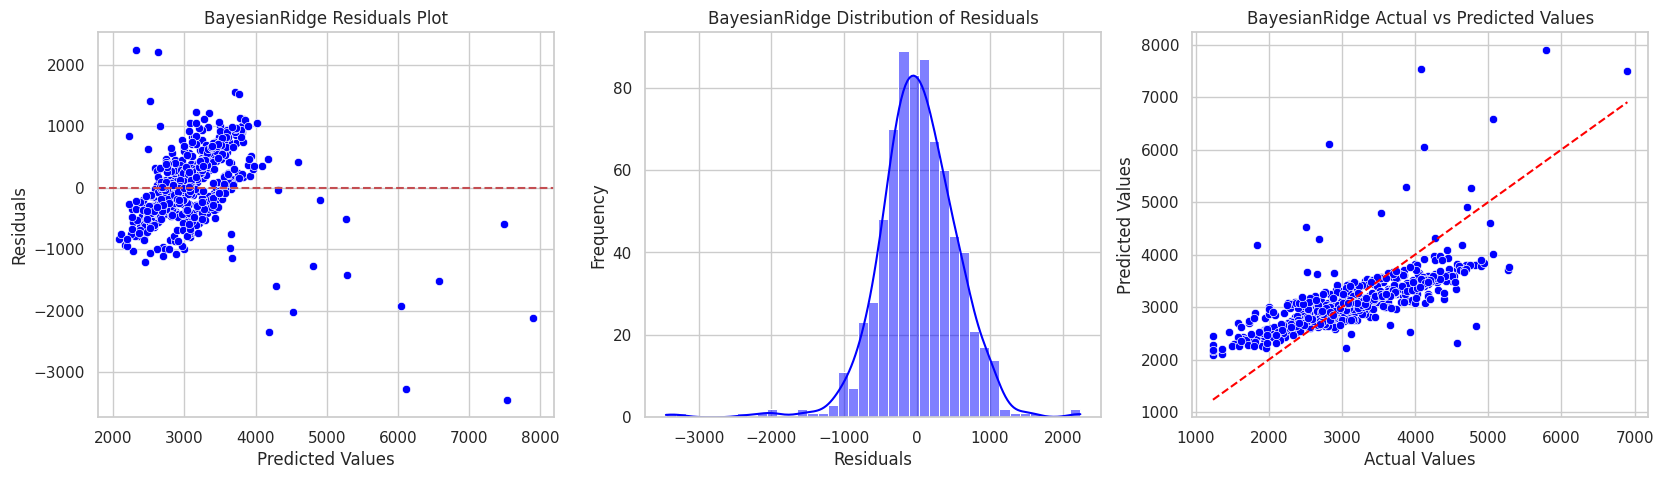

In [ ]:
br = linear_model.BayesianRidge(n_iter = 1000)
train_and_evaluate('BayesianRidge', br, X_train, y_train, X_test, y_test)
model_evaluation_plotter('BayesianRidge', br)

Test set evaluation:
_____________________________________
MAE: 399.9705328741732
MSE: 296437.8913875149
RMSE: 544.4611018130817
R2 Square 0.5270896785875537
__________________________________
------------------------------------------------------------
Train set evaluation:
_____________________________________
MAE: 387.82862024070965
MSE: 285118.98484964017
RMSE: 533.965340494718
R2 Square 0.5351787150326055
__________________________________


<ipython-input-49-0fb1b041c281>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)


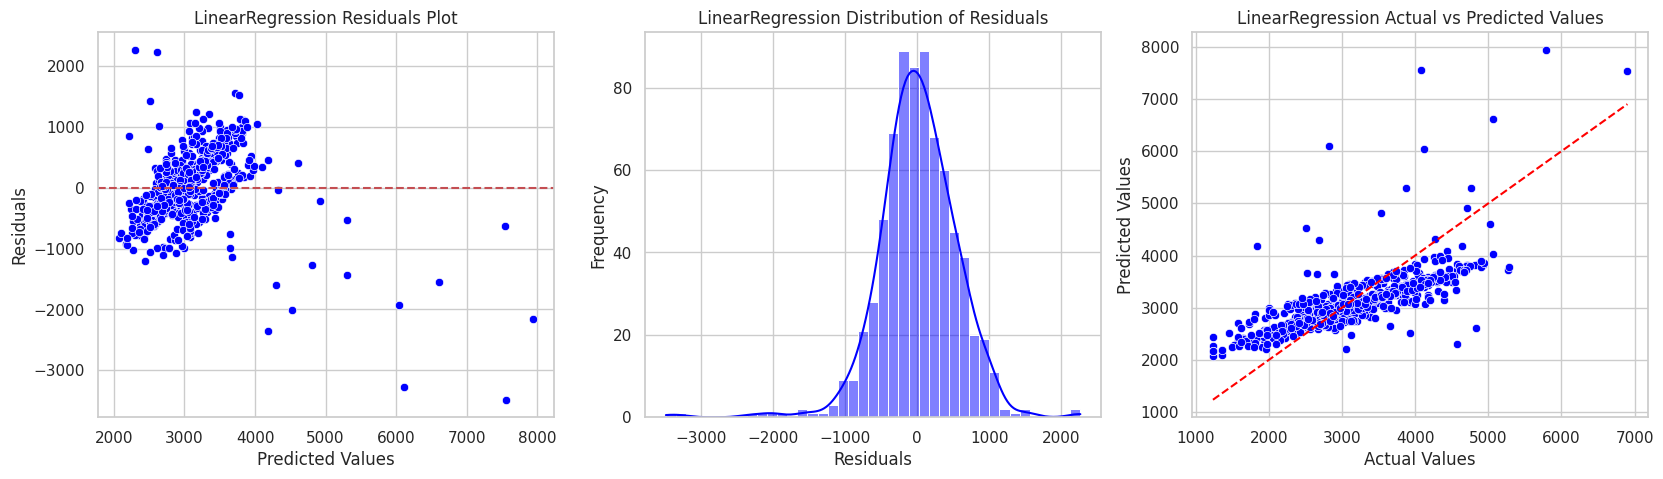

In [ ]:
lr = LinearRegression()
train_and_evaluate('LinearRegression', lr, X_train, y_train, X_test, y_test)
model_evaluation_plotter('LinearRegression', lr)

Test set evaluation:
_____________________________________
MAE: 399.9607212513936
MSE: 296438.29404820554
RMSE: 544.4614715920728
R2 Square 0.5270890362189423
__________________________________
------------------------------------------------------------
Train set evaluation:
_____________________________________
MAE: 387.82152389657944
MSE: 285118.988591216
RMSE: 533.9653439982935
R2 Square 0.5351787089328219
__________________________________


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

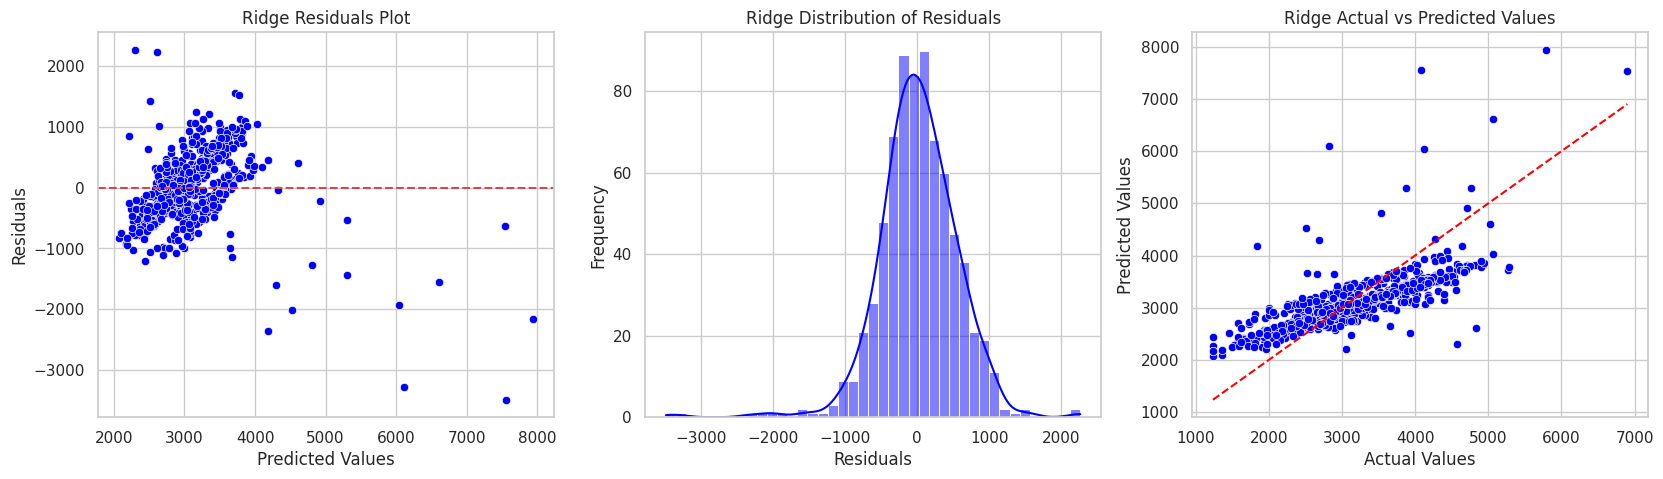

In [ ]:
rg = Ridge(positive=False, solver = 'sag',random_state = 10000, alpha = 0.001)
train_and_evaluate("Ridge", rg, X_train, y_train, X_test, y_test)
model_evaluation_plotter('Ridge', rg)

Test set evaluation:
_____________________________________
MAE: 399.9709827292211
MSE: 296438.0983935976
RMSE: 544.4612919148592
R2 Square 0.5270893483486876
__________________________________
------------------------------------------------------------
Train set evaluation:
_____________________________________
MAE: 387.8289947687608
MSE: 285118.98487103794
RMSE: 533.9653405147548
R2 Square 0.5351787149977213
__________________________________


<ipython-input-49-0fb1b041c281>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)


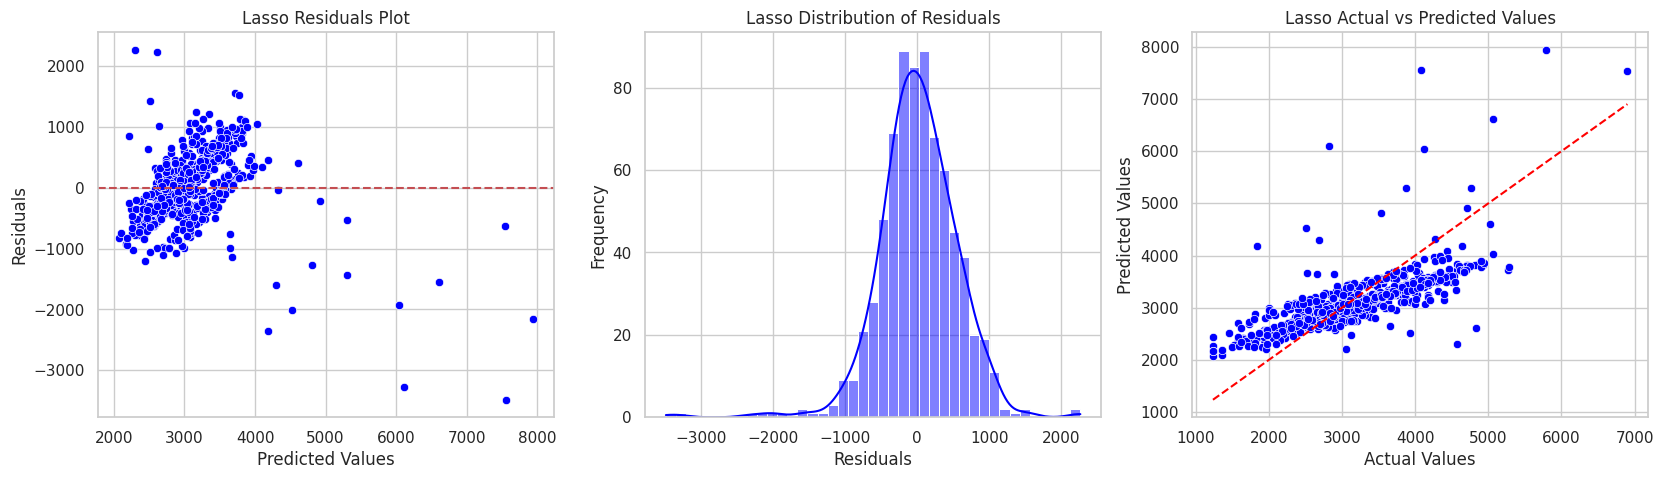

In [ ]:
lasso = Lasso(alpha = 0.001)
train_and_evaluate('Lasso', lasso, X_train, y_train, X_test, y_test)
model_evaluation_plotter('Lasso', lasso)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Test set evaluation:
_____________________________________
MAE: 295.0277239991768
MSE: 165098.06888106247
RMSE: 406.3226167481481
R2 Square 0.7366174059136968
__________________________________
------------------------------------------------------------
Train set evaluation:
_____________________________________
MAE: 199.26131505252042
MSE: 67402.88696849559
RMSE: 259.6206597489799
R2 Square 0.8901150109392735
__________________________________


<ipython-input-49-0fb1b041c281>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)


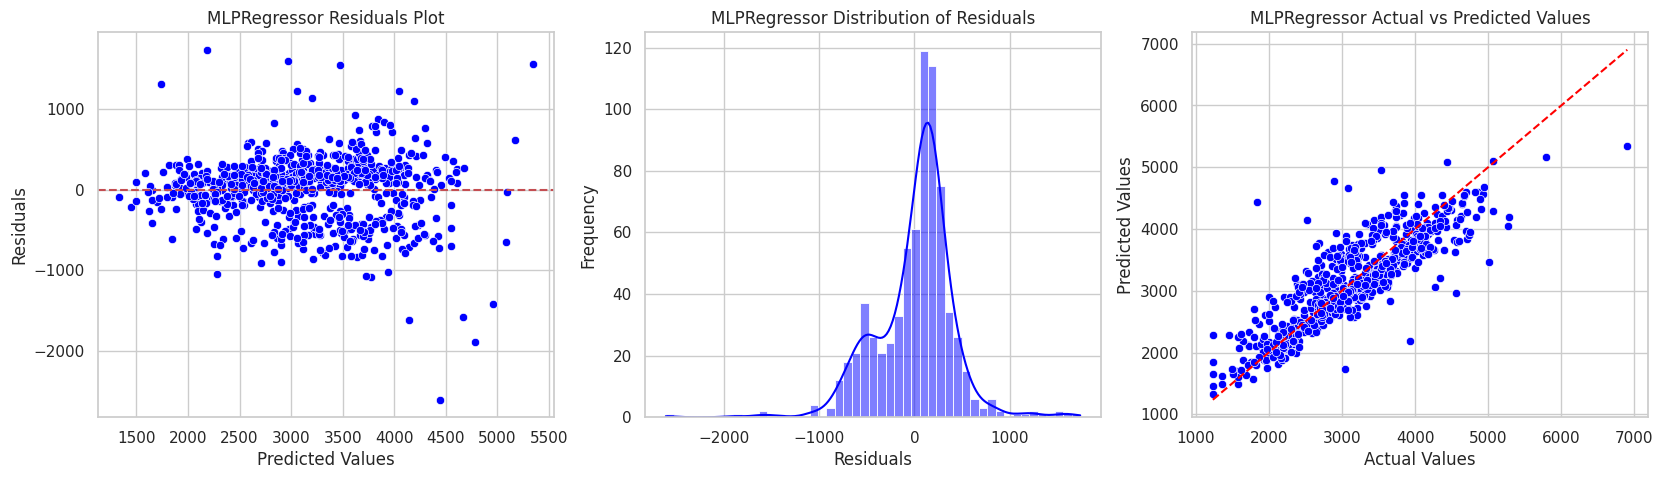

In [ ]:
nn= MLPRegressor(hidden_layer_sizes=(50, 100, 50),
                 max_iter=1000,
                 alpha = 0.01,
                 activation='relu',
                 solver='adam',
                 verbose=0)

train_and_evaluate('MLPRegressor', nn, X_train, y_train, X_test, y_test)
model_evaluation_plotter('MLPRegressor', nn)

In [ ]:
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,LinearRegression,399.970533,2.964379e+05,544.461102,0.527090,-2.849581e+00
1,RANSACRegressor,363.697170,1.059685e+06,1029.410088,-0.690526,-5.558491e+00
2,Ridge,414.664865,3.032077e+05,550.642984,0.516290,-3.581840e+00
3,Polynomail Regression,287.975652,2.178632e+05,466.758151,0.652441,0.000000e+00
4,SGDRegressor,399.972990,2.964382e+05,544.461401,0.527089,-5.660432e+25
5,RandomForestRegressor,263.867701,1.452010e+05,381.052553,0.768359,-1.702256e+01
6,SVR,262.424774,1.738004e+05,416.893802,0.722734,-6.028609e-01
7,ElasticNet,489.381752,3.792810e+05,615.857909,0.394929,-3.825406e+00
8,BayesianRidge,401.142737,2.967727e+05,544.768477,0.526556,-3.825480e+00
9,LinearRegression,399.970533,2.964379e+05,544.461102,0.527090,-2.849581e+00


<Axes: ylabel='Model'>

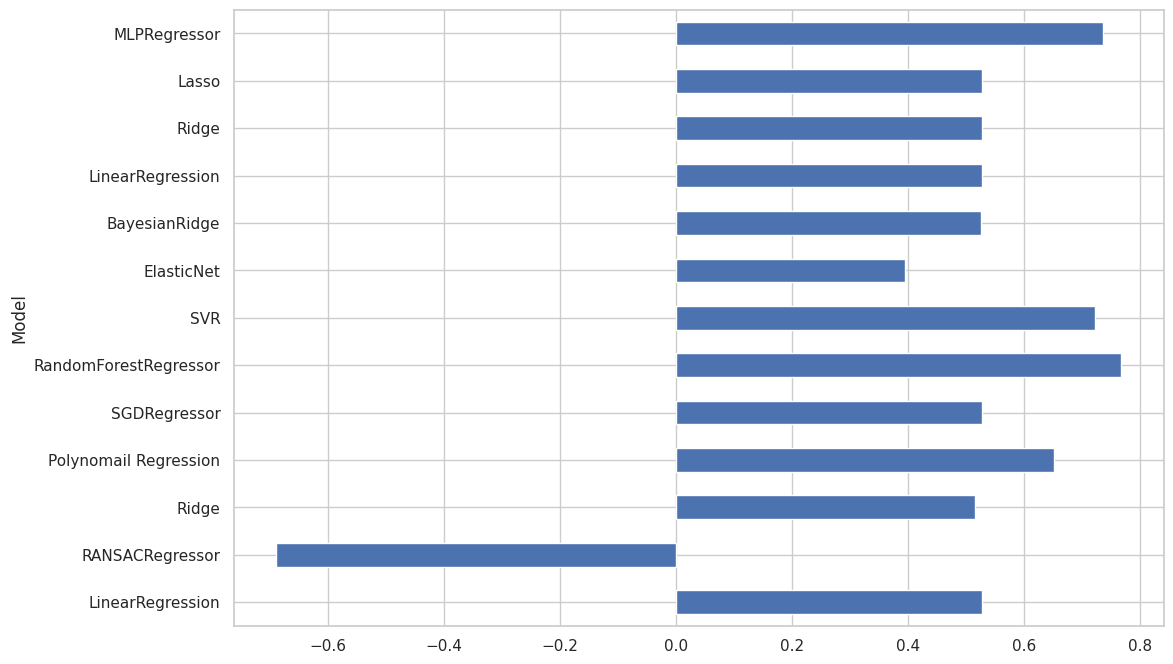

In [ ]:
results_df.set_index('Model', inplace=True)
results_df['R2 Square'].plot(kind='barh', figsize=(12, 8))